In [2]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

import warnings #to remove the warnings
import random
import sys
sys.path.append('../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from genSynData import generateSyntheticDataset
from subsampleData import subsample
from models import trainModels
from f1Models import trainF1CrossValModels
from genFillNulls import *
warnings.filterwarnings('ignore')
numberOfBins = 25


In [3]:

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')

cervicalCols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
                'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                'IUD (years)', 'STDs (number)', 'STDs:condylomatosis',
                'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
                'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
                'Biopsy']

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervical_df = cervical_df[cervicalCols]
cervicalAllNullsRemoved = removeEntriesWithNulls(cervical_df)
print(cervicalAllNullsRemoved.shape)


(59, 32)


In [4]:
knnCER = []
nbCER = []
lrCER = []
svmCER = []
dtCER = []
vcCER = []
for i in range(10):
    X = cervicalAllNullsRemoved[cervicalCols[:-4]]
    y = cervicalAllNullsRemoved[cervicalCols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    #print('Augmented X Train: {}'.format(X_train.shape))
    #print('Augmented y_train: {}'.format(y_train.shape))
    scaler = StandardScaler()

    scores = trainModels(X_train, X_test, y_train, y_test)
    knnCER.append(scores[0])
    nbCER.append(scores[1])
    lrCER.append(scores[2])
    svmCER.append(scores[3])
    dtCER.append(scores[4])
    vcCER.append(scores[5])
    print('Iteration: {}'.format(i))


print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(knnCER), max(knnCER), sum(knnCER)/len(knnCER)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(nbCER), max(nbCER), sum(nbCER)/len(nbCER)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(lrCER), max(lrCER), sum(lrCER)/len(lrCER)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(svmCER), max(svmCER), sum(svmCER)/len(svmCER)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(dtCER), max(dtCER), sum(dtCER)/len(dtCER)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(vcCER), max(vcCER), sum(vcCER)/len(vcCER)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.75, Max: 0.9166666666666666, Avg: 0.8666666666666668
NB  - Min: 0.4166666666666667, Max: 0.75, Avg: 0.6000000000000001
LR  - Min: 0.6666666666666666, Max: 0.9166666666666666, Avg: 0.825
SVM - Min: 0.6666666666666666, Max: 0.9166666666666666, Avg: 0.8083333333333333
DT  - Min: 0.6666666666666666, Max: 0.9166666666666666, Avg: 0.8
VC  - Min: 0.75, Max: 0.9166666666666666, Avg: 0.8500000000000002


In [5]:

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervical_df = cervical_df[cervicalCols]
cervicalAllNullsSyntheticFilled = genSyntheticFillNulls(cervical_df)
print(cervicalAllNullsSyntheticFilled.shape)

for i in cervicalAllNullsSyntheticFilled:
        cervicalAllNullsSyntheticFilled[i] = cervicalAllNullsSyntheticFilled[i].astype(np.float)

(858, 32)


In [7]:
augKnnCER = []
augNbCER = []
augLrCER = []
augSvmCER = []
augDtCER = []
augVcCER = []
for i in range(10):
    X = cervicalAllNullsSyntheticFilled[cervicalCols[:-4]]
    y = cervicalAllNullsSyntheticFilled[cervicalCols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    #print('Augmented X Train: {}'.format(X_train.shape))
    #print('Augmented y_train: {}'.format(y_train.shape))
    scores = trainModels(X_train, X_test, y_train, y_test)
    augKnnCER.append(scores[0])
    augNbCER.append(scores[1])
    augLrCER.append(scores[2])
    augSvmCER.append(scores[3])
    augDtCER.append(scores[4])
    augVcCER.append(scores[5])
    print('Iteration: {}'.format(i))


print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(augKnnCER), max(augKnnCER), sum(augKnnCER)/len(augKnnCER)))
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(augNbCER), max(augNbCER), sum(augNbCER)/len(augNbCER)))
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(augLrCER), max(augLrCER), sum(augLrCER)/len(augLrCER)))
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(augSvmCER), max(augSvmCER), sum(augSvmCER)/len(augSvmCER)))
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(augDtCER), max(augDtCER), sum(augDtCER)/len(augDtCER)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(augVcCER), max(augVcCER), sum(augVcCER)/len(augVcCER)))
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.9244186046511628, Max: 0.9709302325581395, Avg: 0.9459302325581396
NB  - Min: 0.1511627906976744, Max: 0.4011627906976744, Avg: 0.23895348837209301
LR  - Min: 0.9244186046511628, Max: 0.9709302325581395, Avg: 0.9424418604651162
SVM - Min: 0.9244186046511628, Max: 0.9709302325581395, Avg: 0.9459302325581396
DT  - Min: 0.8430232558139535, Max: 0.9186046511627907, Avg: 0.8796511627906979
VC  - Min: 0.9244186046511628, Max: 0.9709302325581395, Avg: 0.9430232558139535


In [4]:

cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervical_df = cervical_df[cervicalCols]
cervicalAllNullsSyntheticFilled = genSyntheticFillNulls(cervical_df)
print(cervicalAllNullsSyntheticFilled.shape)

for i in cervicalAllNullsSyntheticFilled:
        cervicalAllNullsSyntheticFilled[i] = cervicalAllNullsSyntheticFilled[i].astype(np.float)

(858, 32)


In [10]:
augBalKnnCER = []
augBalNbCER = []
augBalLrCER = []
augBalSvmCER = []
augBalDtCER = []
augBalVcCER = []
for i in range(10):
    cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
    cervical_df = cervical_df[cervicalCols]
    cervicalAllNullsSyntheticFilled = genSyntheticFillNulls(cervical_df)

    for j in cervicalAllNullsSyntheticFilled:
        cervicalAllNullsSyntheticFilled[j] = cervicalAllNullsSyntheticFilled[j].astype(np.float)
    X = cervicalAllNullsSyntheticFilled[cervicalCols[:-4]]
    y = cervicalAllNullsSyntheticFilled[cervicalCols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    #print('Augmented X Train: {}'.format(X_train.shape))
    #print('Augmented y_train: {}'.format(y_train.shape))
    numClassSamples = len(y_train) - sum(y_train)
    finalDataset = generateSyntheticDataset(X_train, y_train,  numBenign = numClassSamples, numMalig = numClassSamples)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    #print('Augmented X Train: {}'.format(X_train.shape))
    #print('Augmented y_train: {}'.format(y_train.shape))
    scores = trainModels(X_train, X_test, y_train, y_test)
    augBalKnnCER.append(scores[0])
    augBalNbCER.append(scores[1])
    augBalLrCER.append(scores[2])
    augBalSvmCER.append(scores[3])
    augBalDtCER.append(scores[4])
    augBalVcCER.append(scores[5])
    print('Iteration: {}'.format(i))


print('KNN - Min: {}, Max: {}, Avg: {}'.format(min(augBalKnnCER), max(augBalKnnCER), sum(augBalKnnCER)/len(augBalKnnCER)))
print(augBalKnnCER)
#print('   Best Seed: {}'.format(42 + knnScores.index(max(knnScores))))
print('NB  - Min: {}, Max: {}, Avg: {}'.format(min(augBalNbCER), max(augBalNbCER), sum(augBalNbCER)/len(augBalNbCER)))
print(augBalNbCER)
#print('   Best Seed: {}'.format(42 + naiveBaysScores.index(max(naiveBaysScores))))
print('LR  - Min: {}, Max: {}, Avg: {}'.format(min(augBalLrCER), max(augBalLrCER), sum(augBalLrCER)/len(augBalLrCER)))
print(augBalLrCER)
#print('   Best Seed: {}'.format(42 + logisticRegressionScores.index(max(logisticRegressionScores))))
print('SVM - Min: {}, Max: {}, Avg: {}'.format(min(augBalSvmCER), max(augBalSvmCER), sum(augBalSvmCER)/len(augBalSvmCER)))
print(augBalSvmCER)
#print('   Best Seed: {}'.format(42 + svmRegressionScores.index(max(svmRegressionScores))))
print('DT  - Min: {}, Max: {}, Avg: {}'.format(min(augBalDtCER), max(augBalDtCER), sum(augBalDtCER)/len(augBalDtCER)))
print(augBalDtCER)
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))
print('VC  - Min: {}, Max: {}, Avg: {}'.format(min(augBalVcCER), max(augBalVcCER), sum(augBalVcCER)/len(augBalVcCER)))
print(augBalVcCER)
#print('   Best Seed: {}'.format(42 + decisionTreeRegressionScores.index(max(decisionTreeRegressionScores))))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
KNN - Min: 0.9244186046511628, Max: 0.9709302325581395, Avg: 0.9459302325581396
[0.936046511627907, 0.9534883720930233, 0.9534883720930233, 0.936046511627907, 0.9476744186046512, 0.9593023255813954, 0.9418604651162791, 0.9244186046511628, 0.936046511627907, 0.9709302325581395]
NB  - Min: 0.14534883720930233, Max: 0.936046511627907, Avg: 0.2825581395348837
[0.20348837209302326, 0.19767441860465115, 0.22674418604651161, 0.936046511627907, 0.20930232558139536, 0.22674418604651161, 0.14534883720930233, 0.22674418604651161, 0.2616279069767442, 0.19186046511627908]
LR  - Min: 0.4418604651162791, Max: 0.9534883720930233, Avg: 0.869186046511628
[0.4418604651162791, 0.8895348837209303, 0.9011627906976745, 0.9069767441860465, 0.9244186046511628, 0.9534883720930233, 0.9244186046511628, 0.9127906976744186, 0.9011627906976745, 0.936046511627907]
SVM - Min: 0.168604651162

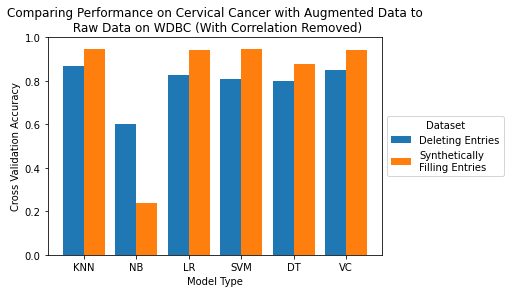

In [10]:
X = ['KNN','NB','LR','SVM', 'DT', 'VC' ]

aug = [np.mean(augKnnCER), np.mean(augNbCER), np.mean(augLrCER),
        np.mean(augSvmCER), np.mean(augDtCER), np.mean(augVcCER)]
reg = [np.mean(knnCER), np.mean(nbCER), np.mean(lrCER),
        np.mean(svmCER), np.mean(dtCER), np.mean(vcCER)]

Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, reg, 0.4, label = 'Deleting Entries')
plt.bar(X_axis + 0.2, aug, 0.4, label = 'Synthetically\nFilling Entries')
  
plt.xticks(X_axis, X)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0,1)
plt.title("Comparing Performance on Cervical Cancer with Augmented Data to\n Raw Data on WDBC (With Correlation Removed)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [4]:
random.seed(42)
np.random.seed(42)
cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervicalCols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
                'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                'IUD (years)', 'STDs (number)', 'STDs:condylomatosis',
                'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
                'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
                'Diagnosis']
cervical_df.rename(columns = {'Biopsy':'Diagnosis'}, inplace = True)
cervicalAllNullsSyntheticFilled = genSyntheticFillNulls(cervical_df)
for j in cervicalAllNullsSyntheticFilled:
    cervicalAllNullsSyntheticFilled[j] = cervicalAllNullsSyntheticFilled[j].astype(np.float)
X = cervicalAllNullsSyntheticFilled[cervicalCols[:-4]]
y = cervicalAllNullsSyntheticFilled[cervicalCols[-1]]
numClassSamples = int(max((len(y) - sum(y)), sum(y)))
finalDataset = generateSyntheticDataset(X, y,  identical = False, numBenign = numClassSamples, numMalig = numClassSamples)
X = finalDataset[finalDataset.columns[:-1]]
y = finalDataset[finalDataset.columns[-1]]
print(X.shape)

balNullFillNB, balNullFillLog, balNullFillSVM, balNullFillDT, balNullFillVote = trainF1CrossValModels(X, y)

print('NB Mean Scores: {}'.format(np.mean(balNullFillNB)))
print('LR Mean Scores: {}'.format(np.mean(balNullFillLog)))
print('SVM Mean Scores: {}'.format(np.mean(balNullFillSVM)))
print('DT Mean Scores: {}'.format(np.mean(balNullFillDT)))
print('VC Mean Scores: {}'.format(np.mean(balNullFillVote)))


(1606, 28)
NB Mean Scores: 0.9885886329701549
LR Mean Scores: 0.7373569573066896
SVM Mean Scores: 0.9049906723810434
DT Mean Scores: 1.0
VC Mean Scores: 0.931671360514884


In [ ]:
random.seed(42)
np.random.seed(42)
cervical_df = pd.read_csv('risk_factors_cervical_cancer.csv')
cervicalCols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
                'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
                'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
                'IUD (years)', 'STDs (number)', 'STDs:condylomatosis',
                'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
                'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
                'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
                'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
                'Diagnosis']
cervical_df.rename(columns = {'Biopsy':'Diagnosis'}, inplace = True)
cervicalAllNullsSyntheticFilled = genSyntheticFillNulls(cervical_df)
for j in cervicalAllNullsSyntheticFilled:
    cervicalAllNullsSyntheticFilled[j] = cervicalAllNullsSyntheticFilled[j].astype(np.float)
X = cervicalAllNullsSyntheticFilled[cervicalCols[:-4]]
y = cervicalAllNullsSyntheticFilled[cervicalCols[-1]]
nullFillNB, nullFillLog, nullFillSVM, nullFillDT, nullFillVote = trainF1CrossValModels(X, y)

print('NB Mean Scores: {}'.format(np.mean(balNullFillNB)))
print('LR Mean Scores: {}'.format(np.mean(balNullFillLog)))
print('SVM Mean Scores: {}'.format(np.mean(balNullFillSVM)))
print('DT Mean Scores: {}'.format(np.mean(balNullFillDT)))
print('VC Mean Scores: {}'.format(np.mean(balNullFillVote)))
